# Vehicle Loan default prediction

In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [0]:
!ls /content/gdrive

'My Drive'


In [0]:
dataset_path = '/content/gdrive/My Drive/Colab Notebooks/Datasets/'

In [0]:
!pip install catboost

     |████████████████████████████████| 60.6MB 1.3MB/s 


In [0]:
#importing the packages
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime as dt
from datetime import date
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xg
from sklearn.metrics import mean_squared_error, accuracy_score,confusion_matrix,roc_auc_score,cohen_kappa_score
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from catboost import CatBoostClassifier


In [0]:
#loading the train and test data
train_data = pd.read_csv(dataset_path+'l&t_train.csv')
test_data = pd.read_csv(dataset_path+'l&t_test.csv')

In [0]:
train_data.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [0]:
test_data.head()

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,State_ID,Employee_code_ID,...,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,Age_of_customer,Not_Scored,Very_Low,Very_High,No_History,asset_value,value_cost,DisbursalYear
0,53478,63558,86.54,67,22807,45,1497,0,6,1998,...,0,0,45,0,0,0,1,50539.0,13019.0,2018
1,55513,63163,89.45,67,22807,45,1497,1,6,1998,...,12,1,34,0,1,0,0,58634.0,4529.0,2018
2,65282,84320,79.93,78,23135,86,2071,0,4,1646,...,0,0,24,0,0,0,1,49045.0,35275.0,2018
3,46905,63896,76.58,78,17014,45,2070,1,4,1646,...,29,0,46,1,0,0,0,50629.0,13267.0,2018
4,51428,63896,86.08,78,17014,45,2069,0,4,1646,...,0,0,47,0,0,0,1,51906.0,11990.0,2018


In [0]:
train_data.dtypes

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Date.of.Birth                           object
Employment.Type                         object
DisbursalDate                           object
State_ID                                 int64
Employee_code_ID                         int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PERFORM_CNS.SCORE.DESCRIPTION           object
PRI.NO.OF.ACC

In [0]:
#shaoe of the train data
train_data.shape

(233154, 41)

In [0]:
#shape of the test data
test_data.shape

(112392, 40)

In [0]:
#checking the missing values in tarin data
train_data.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [0]:
#checking the missing values in test data
test_data.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        3443
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [0]:
train_data['Employment.Type'].value_counts()

Self employed    127635
Salaried          97858
Name: Employment.Type, dtype: int64

In [0]:
7661/233154

0.0328581109481287

In [0]:
#calculating the mode value
train_data['Employment.Type'].mode()

0    Self employed
dtype: object

In [0]:
#replacing the missing values with mode
train_data["Employment.Type"] = train_data['Employment.Type'].replace({np.NaN:'Self employed'})
test_data["Employment.Type"] = test_data['Employment.Type'].replace({np.NaN:'Self employed'})

In [0]:
#cleaning the avverage acct age extracting to months
month = []
for i in range(len(train_data['AVERAGE.ACCT.AGE'])):
    month.append((int(train_data['AVERAGE.ACCT.AGE'][i].split(" ")[0][:-3])*12)+
    int(train_data['AVERAGE.ACCT.AGE'][i].split(" ")[1][:-3]))

In [0]:
month1 = []
for i in range(len(test_data['AVERAGE.ACCT.AGE'])):
    month1.append((int(test_data['AVERAGE.ACCT.AGE'][i].split(" ")[0][:-3])*12)+
    int(test_data['AVERAGE.ACCT.AGE'][i].split(" ")[1][:-3]))

In [0]:
train_data['AVERAGE.ACCT.AGE'] = month

In [0]:
test_data['AVERAGE.ACCT.AGE'] = month1

In [0]:
#cleaning the credit history length extracting to months
credit_month=[]
for i in range (len(train_data["CREDIT.HISTORY.LENGTH"])):
    credit_month.append((int(train_data['CREDIT.HISTORY.LENGTH'][i].split(" ")[0][:-3])*12)+int(train_data['CREDIT.HISTORY.LENGTH'][i].split(" ")[1][:-3]))

In [0]:
credit_month1=[]
for i in range (len(test_data["CREDIT.HISTORY.LENGTH"])):
    credit_month1.append((int(test_data['CREDIT.HISTORY.LENGTH'][i].split(" ")[0][:-3])*12)+int(test_data['CREDIT.HISTORY.LENGTH'][i].split(" ")[1][:-3]))

In [0]:
train_data['CREDIT.HISTORY.LENGTH']=credit_month

In [0]:
test_data['CREDIT.HISTORY.LENGTH']=credit_month1

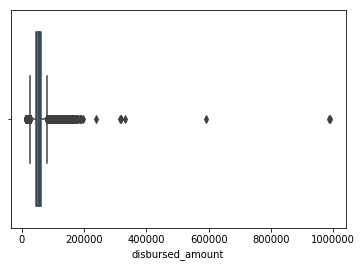

In [0]:
#box plot for disburswd amount
sns.boxplot(train_data['disbursed_amount'])

In [0]:
#train_data['disbursed_amount'] = train_data[train_data['disbursed_amount']<20000].reset_index(drop=True)  #removing the outliers

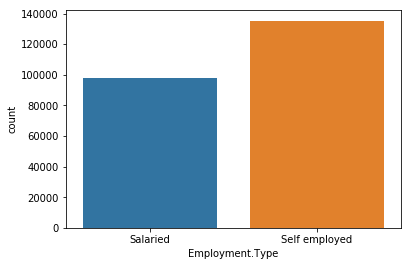

In [0]:
#plotting the number of salaried and self employed one
sns.countplot(train_data['Employment.Type'])

loan_default,0,1,Total
Employment.Type,,,
Salaried,77948,19910,97858
Self employed,104595,30701,135296
Total,182543,50611,233154


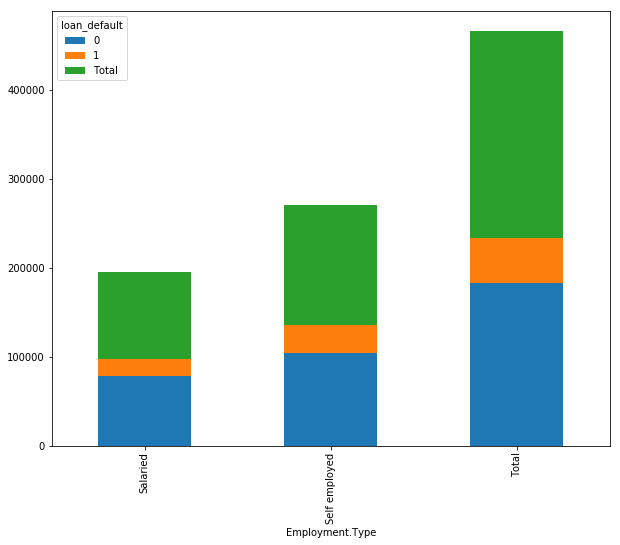

In [0]:
#checking the defaulters within salalried and self employed
plot = pd.crosstab(train_data['Employment.Type'],train_data['loan_default'],margins_name='Total',margins=True)
plot.plot(kind='bar',figsize=(10,8),stacked=True)
plot

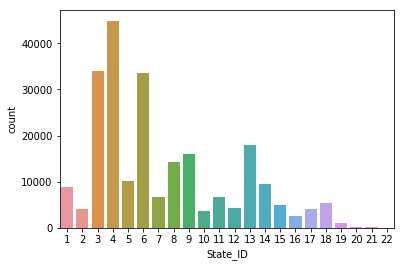

In [0]:
#plotting the number of different state counts
sns.countplot(train_data['State_ID'])

In [0]:
#checking the defaulters within the states
pd.crosstab(train_data['State_ID'],train_data['loan_default'],margins_name='Total',margins=True)

loan_default,0,1,Total
State_ID,,,
1,7353,1583,8936
2,3031,1129,4160
3,27733,6345,34078
4,35544,9326,44870
5,8154,2023,10177
6,26615,6890,33505
7,5417,1369,6786
8,10939,3258,14197
9,12530,3492,16022


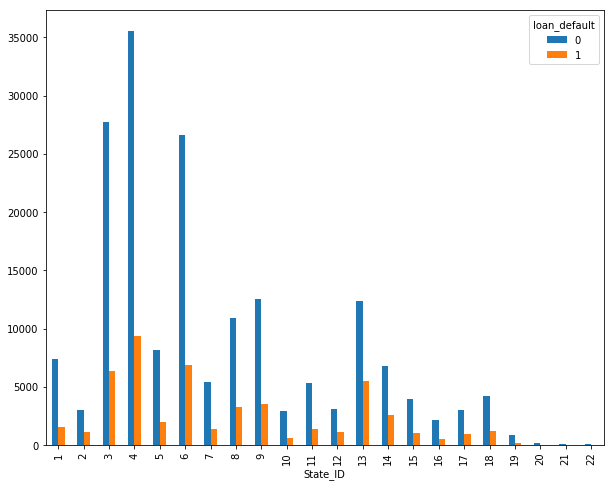

In [0]:
#plotting 
state_plot = pd.crosstab(train_data['State_ID'],train_data['loan_default'])
state_plot.plot(kind='bar',figsize=(10,8))

In [0]:
train_data['Aadhar_flag'].value_counts()

1    195924
0     37230
Name: Aadhar_flag, dtype: int64

loan_default,0,1,Total
Aadhar_flag,,,
0,27684,9546,37230
1,154859,41065,195924
Total,182543,50611,233154


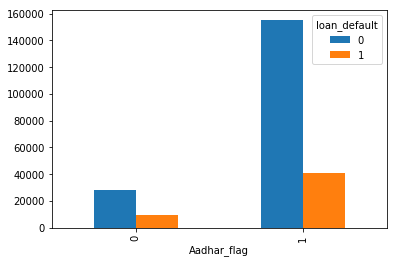

In [0]:
#checking the defaulters with adharr or without adhaar
adhar_plot = pd.crosstab(train_data['Aadhar_flag'],train_data['loan_default'])
adhar_plot.plot(kind='bar')
pd.crosstab(train_data['Aadhar_flag'],train_data['loan_default'],margins_name='Total',margins=True)

Aadhar_flag,0,1
Employment.Type,,
Salaried,12276,85582
Self employed,24954,110342


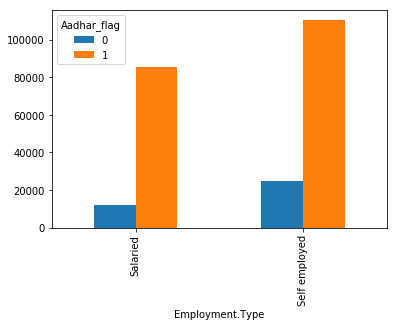

In [0]:
adharVsSalaried = pd.crosstab(train_data['Employment.Type'],train_data['Aadhar_flag'])
adharVsSalaried.plot(kind='bar')
pd.crosstab(train_data['Employment.Type'],train_data['Aadhar_flag'])

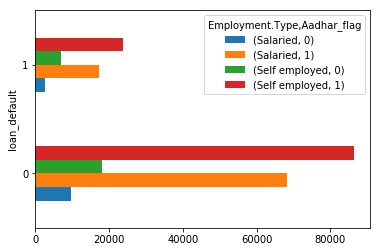

In [0]:
plyt= pd.crosstab(train_data['loan_default'],[train_data['Employment.Type'],train_data['Aadhar_flag']])
plyt.plot(kind='barh')

In [0]:
# which type of employees are taking the more disbursed amount
train_data.groupby(['Employment.Type'])['disbursed_amount'].sum()  

Employment.Type
Salaried         5336662103
Self employed    7336888366
Name: disbursed_amount, dtype: int64

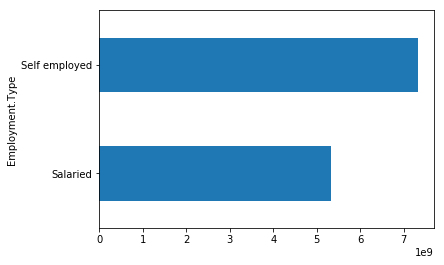

In [0]:
emp_plot = train_data.groupby(['Employment.Type'])['disbursed_amount'].sum()  
emp_plot.plot(kind='barh')

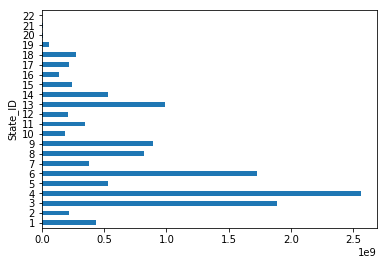

In [0]:
#plotting how the dusbursed the loan amount in different states
stae_plot = train_data.groupby(['State_ID'])['disbursed_amount'].sum()
stae_plot.plot(kind='barh')

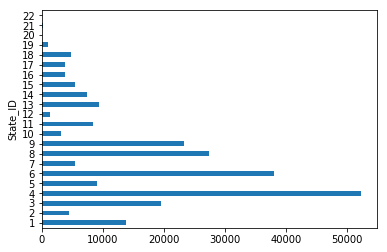

In [0]:
# count of toatal actiave loans of the customer grouping by state
stateVspri_active=train_data.groupby(['State_ID'])['PRI.ACTIVE.ACCTS'].sum()
stateVspri_active.plot(kind='barh')


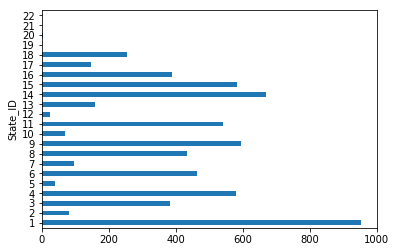

In [0]:
#secondary account in different states
stateVspri_active=train_data.groupby(['State_ID'])['SEC.ACTIVE.ACCTS'].sum()
stateVspri_active.plot(kind='barh')

Employment.Type
Salaried         18311459010
Self employed    32531477525
Name: PRI.DISBURSED.AMOUNT, dtype: int64

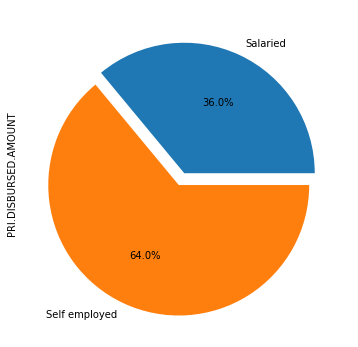

In [0]:
# analysis on which type of employyes are having more amount of disbursement at the time of laon disbursement 
#for primary accounts
empVsdisbursed = train_data.groupby(['Employment.Type'])['PRI.DISBURSED.AMOUNT'].sum()
explode = (0, 0.1)
empVsdisbursed.plot.pie(subplots=True,figsize=(6,6),explode=explode,autopct='%1.1f%%')
train_data.groupby(['Employment.Type'])['PRI.DISBURSED.AMOUNT'].sum()
#as you can see that self employed are having more amount of disbursement


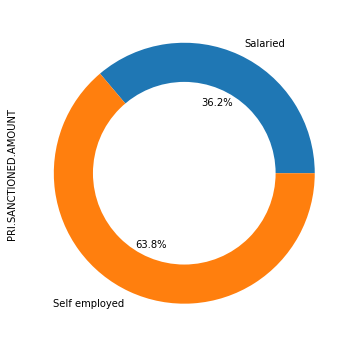

In [0]:
# analysis on which type of employyes are having more amount of sanction at the time of laon disbursement 
empVssanction = train_data.groupby(['Employment.Type'])['PRI.SANCTIONED.AMOUNT'].sum()
empVssanction.plot.pie(subplots=True,figsize=(6,6),autopct='%1.1f%%')
train_data.groupby(['Employment.Type'])['PRI.SANCTIONED.AMOUNT'].sum()
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

In [0]:
#stateVsempType= pd.crosstab(train_data['State_ID'],train_data['Employment.Type'],margins=True,margins_name='All')
#stateVsempType.plot.bar(figsize=(16,8))
pd.crosstab(train_data['State_ID'],train_data['Employment.Type'],margins=True,margins_name='All')
#state 4 has hight number of salaried and state 3 contains high nymber of self employes

Employment.Type,Salaried,Self employed,All
State_ID,,,
1,3888,5048,8936
2,3141,1019,4160
3,4511,29567,34078
4,24365,20505,44870
5,3926,6251,10177
6,16446,17059,33505
7,1392,5394,6786
8,7600,6597,14197
9,6884,9138,16022


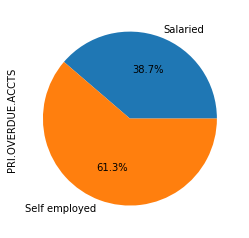

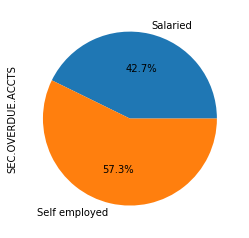

In [0]:
# analysis on which type of employyes are having more default accountsof at the time of laon disbursement 
empVsOverDue_pri = train_data.groupby(['Employment.Type'])['PRI.OVERDUE.ACCTS'].sum()
empVsOverDue_sec = train_data.groupby(['Employment.Type'])['SEC.OVERDUE.ACCTS'].sum()
empVsOverDue_pri,empVsOverDue_sec
plt.figure(0)
empVsOverDue_pri.plot.pie(subplots=True,figsize=(6,4),autopct='%1.1f%%')
plt.figure(1)
empVsOverDue_sec.plot.pie(subplots=True,figsize=(6,4),autopct='%1.1f%%')
plt.show()
#we can see that both of primary and secondary account hoders of salaried are having more default accounts

Employment.Type
Salaried          97858
Self employed    135296
Name: NO.OF_INQUIRIES, dtype: int64

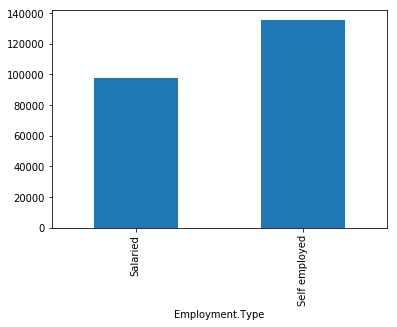

In [0]:
#let see that whicg=h type of employees are getting more number of enquires are getting
train_data.groupby(['Employment.Type'])['NO.OF_INQUIRIES'].count().plot.bar()
train_data.groupby(['Employment.Type'])['NO.OF_INQUIRIES'].count()
#self employeed people are having more number of enquiry calls

In [0]:
train_data['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the customer        3672
Not Scored

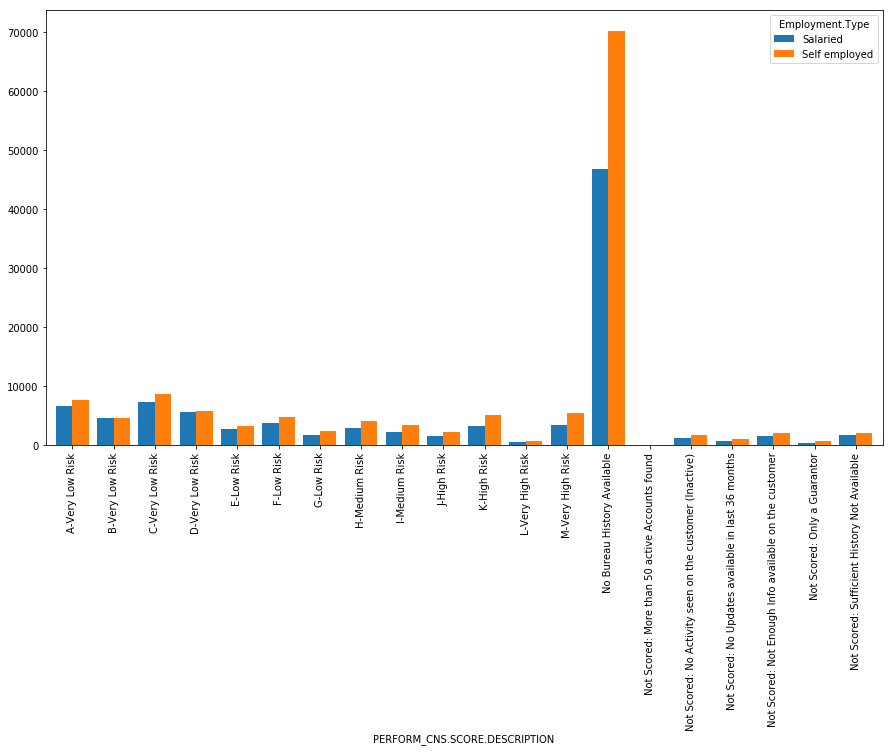

In [0]:
#performimg bureau score vs employee type
#pd.crosstab(train_data['PERFORM_CNS.SCORE.DESCRIPTION'],train_data['Employment.Type'],margins=True,margins_name='Total')
pd.crosstab(train_data['PERFORM_CNS.SCORE.DESCRIPTION'],train_data['Employment.Type']).plot.bar(figsize=(15,8),width=0.8)
#as you can see that both of the employee categories are in left skewed position

In [0]:
train_data.groupby(['branch_id'])['PRI.NO.OF.ACCTS'].count().sort_values()
#as you can see that the branch id 2 has more count of loans taken by customer at the time of disbursement

branch_id
158       69
111       89
84       156
261      176
217      183
66       314
100      331
259      346
101      368
260      372
258      374
97       389
142      473
117      558
43       584
207      689
62       691
153      692
35       693
69       810
76       855
249      858
121      884
165     1021
82      1035
130     1069
17      1160
257     1256
72      1294
77      1445
       ...  
8       3146
135     3203
7       3222
79      3413
160     3505
65      3509
251     3844
103     3878
10      4125
147     4160
120     4210
74      4297
138     4352
20      4431
11      4506
48      4725
61      4906
152     4933
18      5032
146     5376
1       5709
19      5860
16      6466
34      7794
136     7833
36      8832
5       9218
3       9230
67     11328
2      13138
Name: PRI.NO.OF.ACCTS, Length: 82, dtype: int64

In [0]:
#extracting age of the customer
train_data['Age_of_customer']=abs(datetime.datetime.now().year-pd.to_datetime(train_data['Date.of.Birth'],format='%d-%m-%y').dt.year)

In [0]:
test_data['Age_of_customer']=abs(datetime.datetime.now().year-pd.to_datetime(test_data['Date.of.Birth'],format='%d-%m-%y').dt.year)

In [0]:
train_data['manufacturer_id'].value_counts()

86     109534
45      56626
51      27204
48      16710
49      10220
120      9658
67       2405
145       778
153        12
152         6
156         1
Name: manufacturer_id, dtype: int64

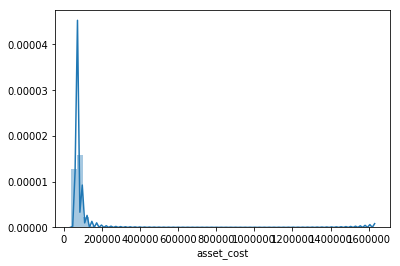

In [0]:
sns.distplot(train_data['asset_cost'])

## Feature engineering

In [0]:
train_data['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the customer        3672
Not Scored

In [0]:
train_data['PERFORM_CNS.SCORE.DESCRIPTION']=train_data['PERFORM_CNS.SCORE.DESCRIPTION'].replace({'C-Very Low Risk':'Very Low Risk','A-Very Low Risk':'Very Low Risk','D-Very Low Risk':'Very Low Risk',
                                                    'B-Very Low Risk':'Very Low Risk','M-Very High Risk':'Very High Risk','L-Very High Risk':'Very High Risk',
                                                     'F-Low Risk':'Low Risk','E-Low Risk':'Low Risk','H-Medium Risk':'Medium Risk','I-Medium Risk':'Medium Risk',
                                                     'J-High Risk':'High Risk','K-High Risk':'High Risk','G-Low Risk':'Low Risk'})

In [0]:
test_data['PERFORM_CNS.SCORE.DESCRIPTION']=test_data['PERFORM_CNS.SCORE.DESCRIPTION'].replace({'C-Very Low Risk':'Very Low Risk','A-Very Low Risk':'Very Low Risk','D-Very Low Risk':'Very Low Risk',
                                                    'B-Very Low Risk':'Very Low Risk','M-Very High Risk':'Very High Risk','L-Very High Risk':'Very High Risk',
                                                     'F-Low Risk':'Low Risk','E-Low Risk':'Low Risk','H-Medium Risk':'Medium Risk','I-Medium Risk':'Medium Risk',
                                                     'J-High Risk':'High Risk','K-High Risk':'High Risk','G-Low Risk':'Low Risk'})

In [0]:
train_data['Not_Scored'] = np.where(train_data['PERFORM_CNS.SCORE.DESCRIPTION'].str.contains('Not Scored'),1,0)
train_data['Very_Low']=  np.where(train_data['PERFORM_CNS.SCORE.DESCRIPTION'].str.contains('Very Low '),1,0)
train_data['Very_High']=  np.where(train_data['PERFORM_CNS.SCORE.DESCRIPTION'].str.contains('Very High'),1,0)
train_data['No_History']=  np.where(train_data['PERFORM_CNS.SCORE.DESCRIPTION'].str.contains('No Bureau'),1,0)

In [0]:
test_data['Not_Scored'] = np.where(test_data['PERFORM_CNS.SCORE.DESCRIPTION'].str.contains('Not Scored'),1,0)
test_data['Very_Low']=  np.where(test_data['PERFORM_CNS.SCORE.DESCRIPTION'].str.contains('Very Low '),1,0)
test_data['Very_High']=  np.where(test_data['PERFORM_CNS.SCORE.DESCRIPTION'].str.contains('Very High'),1,0)
test_data['No_History']=  np.where(test_data['PERFORM_CNS.SCORE.DESCRIPTION'].str.contains('No Bureau'),1,0)

In [0]:
train_data['asset_value'] = np.round(train_data['asset_cost']*(train_data['ltv']/100),0)
train_data['value_cost'] = train_data['asset_cost']-train_data['asset_value']

In [0]:
test_data['asset_value'] = np.round(train_data['asset_cost']*(test_data['ltv']/100),0)
test_data['value_cost'] = test_data['asset_cost']-test_data['asset_value']

In [0]:
train_data['DisbursalDate'] = pd.to_datetime(train_data['DisbursalDate'],format='%d-%m-%y')

In [0]:
train_data.dtypes

UniqueID                                        int64
disbursed_amount                                int64
asset_cost                                      int64
ltv                                           float64
branch_id                                       int64
supplier_id                                     int64
manufacturer_id                                 int64
Current_pincode_ID                              int64
Date.of.Birth                                  object
Employment.Type                                object
DisbursalDate                          datetime64[ns]
State_ID                                        int64
Employee_code_ID                                int64
MobileNo_Avl_Flag                               int64
Aadhar_flag                                     int64
PAN_flag                                        int64
VoterID_flag                                    int64
Driving_flag                                    int64
Passport_flag               

In [0]:
train_data['DisbursalYear'] = pd.to_datetime(train_data['DisbursalDate'],format='%d-%m-%y').dt.year
test_data['DisbursalYear'] = pd.to_datetime(test_data['DisbursalDate'],format='%d-%m-%y').dt.year

In [0]:
train_data.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default', 'Age_of_customer', 'Not_Scored', 'Very_Low',
       'Very_High', 'No_History', 'asset_value', 'v

In [0]:
train_data.drop(['Date.of.Birth','DisbursalDate','UniqueID','MobileNo_Avl_Flag', 'VoterID_flag','UniqueID'],axis=1,inplace=True)
test_data.drop(['Date.of.Birth','DisbursalDate','UniqueID','MobileNo_Avl_Flag', 'VoterID_flag','UniqueID'],axis=1,inplace=True)

## Applying encoding for categorical variables

In [0]:
le = LabelEncoder()

In [0]:
train_data['Employment.Type'] =le.fit_transform(train_data['Employment.Type']) 
train_data['PERFORM_CNS.SCORE.DESCRIPTION'] = le.fit_transform(train_data['PERFORM_CNS.SCORE.DESCRIPTION'])
test_data['Employment.Type'] =le.fit_transform(test_data['Employment.Type']) 
test_data['PERFORM_CNS.SCORE.DESCRIPTION'] = le.fit_transform(test_data['PERFORM_CNS.SCORE.DESCRIPTION'])

In [0]:
train_data['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

3     116950
11     50728
1      18294
2      12412
0      12025
10      9910
9       3765
7       3672
5       2885
6       1534
8        976
4          3
Name: PERFORM_CNS.SCORE.DESCRIPTION, dtype: int64

### Applying the models

In [0]:
train_data.dtypes

disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Employment.Type                          int64
State_ID                                 int64
Employee_code_ID                         int64
Aadhar_flag                              int64
PAN_flag                                 int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PERFORM_CNS.SCORE.DESCRIPTION            int64
PRI.NO.OF.ACCTS                          int64
PRI.ACTIVE.ACCTS                         int64
PRI.OVERDUE.ACCTS                        int64
PRI.CURRENT.BALANCE                      int64
PRI.SANCTIONED.AMOUNT                    int64
PRI.DISBURSED

In [0]:
#train test split
x = train_data.drop(['loan_default'],axis=1)

In [0]:
y = train_data['loan_default']

In [0]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.25,random_state=1234)

In [0]:
train_x.shape,test_x.shape,train_y.shape,test_y.shape 

((174865, 43), (58289, 43), (174865,), (58289,))

## Applying random forest

In [0]:
rf = RandomForestClassifier()

In [0]:
rf.fit(train_x,train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
pred = rf.predict(test_x)

In [0]:
accuracy_score(pred,test_y)

0.7708830139477432

In [0]:
roc_auc_score(pred,test_y)

0.5771363897629405

In [0]:
test_data.shape


(112392, 43)

In [0]:
pd.DataFrame(pred).shape

(58289, 1)

## Applying the decision tree

In [0]:
tree = DecisionTreeClassifier()

In [0]:
tree.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [0]:
pred = tree.predict(test_x)

In [0]:
accuracy_score(pred,test_y)

0.6693887354389336

In [0]:
roc_auc_score(pred,test_y)

0.5254831398396446

## Applying xg boost

In [0]:
xg = XGBClassifier(learning_rate=0.5, max_depth=5,colsample_bytree=0.3,n_estimators=100,subsample=0.8,gamma=0.0)

In [0]:
xg.fit(train_x,train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0.0, learning_rate=0.5,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.8)

In [0]:
xg.feature_importances_

array([0.02887037, 0.01877704, 0.02141557, 0.02257495, 0.01832147,
       0.02725427, 0.03432903, 0.03226312, 0.02411653, 0.01859658,
       0.01516478, 0.02263533, 0.01386545, 0.01223523, 0.02563418,
       0.09377249, 0.03156463, 0.0205687 , 0.02133855, 0.01657881,
       0.02055024, 0.03369845, 0.00998742, 0.00590047, 0.01685629,
       0.01236307, 0.00896682, 0.01303357, 0.02025744, 0.01299293,
       0.01619486, 0.03728561, 0.01709434, 0.01856166, 0.04178745,
       0.01829833, 0.01521788, 0.01501648, 0.06497606, 0.02044101,
       0.02579233, 0.03485031, 0.        ], dtype=float32)

In [0]:
from sklearn.feature_selection import SelectFromModel


In [0]:
tresholds = sorted(xg.feature_importances_)
for tresh in tresholds:
  selection  = SelectFromModel(xg,threshold=tresh, prefit=True)
  select_x_train = selection.transform(train_x)
  selection_model = XGBClassifier()
  selection_model.fit(select_x_train,train_y)
  select_X_test = selection.transform(test_x)
  y_pred = selection_model.predict(select_X_test)
  acc = accuracy_score(y_pred,test_y)
  print("Thresh=%.5f, n=%d, Accuracy: %.2f%%" % (tresh, select_x_train.shape[1], acc*100.0))

Thresh=0.00000, n=43, Accuracy: 78.35%
Thresh=0.00590, n=42, Accuracy: 78.35%
Thresh=0.00897, n=41, Accuracy: 78.35%
Thresh=0.00999, n=40, Accuracy: 78.35%
Thresh=0.01224, n=39, Accuracy: 78.35%


KeyboardInterrupt: ignored

In [0]:
xg_predict = xg.predict(test_x)

In [0]:
accuracy_score(test_y,xg_predict)

0.78073049803565

In [0]:
roc_auc_score(test_y,xg_predict)

0.513179558354895

## applying gradient boosting

In [0]:
grad= GradientBoostingClassifier()

In [0]:
grad.fit(train_x,train_y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [0]:
grad = grad.predict(test_x)

In [0]:
accuracy_score(test_y,grad)

0.7837499356653914

In [0]:
roc_auc_score(test_y,grad)

0.5022819327812041

In [0]:
#computing with various gradients
learning_rates = [0.02,0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=400, learning_rate = learning_rate, max_features=2, 
                                    max_depth = 2, random_state = 0)
    gb.fit(train_x,train_y)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(train_x, train_y)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(test_x, test_y)))
    print()

Learning rate:  0.02
Accuracy score (training): 0.783
Accuracy score (validation): 0.783

Learning rate:  0.05
Accuracy score (training): 0.783
Accuracy score (validation): 0.783

Learning rate:  0.1
Accuracy score (training): 0.783
Accuracy score (validation): 0.784

Learning rate:  0.25
Accuracy score (training): 0.784
Accuracy score (validation): 0.784

Learning rate:  0.5
Accuracy score (training): 0.784
Accuracy score (validation): 0.784

Learning rate:  0.75
Accuracy score (training): 0.785
Accuracy score (validation): 0.783

Learning rate:  1
Accuracy score (training): 0.785
Accuracy score (validation): 0.782



##  Applying catboost classifier

In [0]:
cat = CatBoostClassifier()

In [0]:
cat.fit(train_x,train_y)

Learning rate set to 0.072245
0:	learn: 0.6662663	total: 116ms	remaining: 1m 55s
1:	learn: 0.6436586	total: 240ms	remaining: 1m 59s
2:	learn: 0.6235642	total: 360ms	remaining: 1m 59s
3:	learn: 0.6067712	total: 480ms	remaining: 1m 59s
4:	learn: 0.5922186	total: 614ms	remaining: 2m 2s
5:	learn: 0.5804471	total: 730ms	remaining: 2m
6:	learn: 0.5697271	total: 846ms	remaining: 1m 59s
7:	learn: 0.5606834	total: 981ms	remaining: 2m 1s
8:	learn: 0.5531968	total: 1.12s	remaining: 2m 3s
9:	learn: 0.5464542	total: 1.25s	remaining: 2m 3s
10:	learn: 0.5413646	total: 1.37s	remaining: 2m 3s
11:	learn: 0.5364986	total: 1.5s	remaining: 2m 3s
12:	learn: 0.5324361	total: 1.65s	remaining: 2m 5s
13:	learn: 0.5291294	total: 1.78s	remaining: 2m 5s
14:	learn: 0.5259418	total: 1.92s	remaining: 2m 6s
15:	learn: 0.5230102	total: 2.05s	remaining: 2m 6s
16:	learn: 0.5205292	total: 2.19s	remaining: 2m 6s
17:	learn: 0.5185525	total: 2.32s	remaining: 2m 6s
18:	learn: 0.5167600	total: 2.46s	remaining: 2m 6s
19:	learn:

In [0]:
cat_predict = cat.predict(test_x)

In [0]:
accuracy_score(cat_predict,test_y)

0.7847964452984268